In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

In [2]:
climate = pd.read_csv('Data/train.csv')

In [3]:
climate.head()

Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

In [4]:
climate['year_built'].replace(0, np.NaN, inplace=True)
climate.dropna(subset=['year_built'], inplace=True)

In [5]:
# Age of building 
def age(df):
    if type(df['year_built']) == float and pd.isna(df['year_built']):
        return 0
    else:
        return (2022 - df['year_built'])

In [6]:
climate['age']=climate.apply(age, axis=1)
climate.drop('year_built', axis=1, inplace=True)
climate.drop('id', axis=1, inplace=True)

In [7]:
climate.loc[climate['facility_type'].str.contains('Lodging'), 'facility_type'] = 'lodging'
climate.loc[climate['facility_type'].str.contains('Education'), 'facility_type'] = 'education'
climate.loc[climate['facility_type'].str.contains('Health'), 'facility_type'] = 'healthcare'
climate.loc[climate['facility_type'].str.contains('Public_Safety'), 'facility_type'] = 'public_safety'
climate.loc[climate['facility_type'].str.contains('Public_Assembly'), 'facility_type'] = 'public_assembly'
climate.loc[climate['facility_type'].str.contains('Food', case = False), 'facility_type'] = 'food'
climate.loc[climate['facility_type'].str.contains('Retail'), 'facility_type'] = 'retail'
climate.loc[climate['facility_type'].str.contains('Warehouse'), 'facility_type'] = 'warehouse'
climate.loc[climate['facility_type'].str.contains('Service'), 'facility_type'] = 'service'
climate.loc[climate['facility_type'].str.contains('Commercial'), 'facility_type'] = 'commercial'
climate.loc[climate['facility_type'].str.contains('Office'), 'facility_type'] = 'office'
climate.loc[climate['facility_type'].str.contains('Residential'), 'facility_type'] = 'Multifamily_Uncategorized'
climate.loc[climate['facility_type'].str.contains('Building'), 'facility_type'] = 'Multifamily_Uncategorized'
climate.loc[climate['facility_type'].str.contains('Lab'), 'facility_type'] = 'healthcare'
climate.loc[climate['facility_type'].str.contains('Multifamily'), 'facility_type'] = 'Multifamily'
climate.loc[climate['facility_type'].str.contains('Data'), 'facility_type'] = 'commercial'
climate.loc[climate['facility_type'].str.contains('service'), 'facility_type'] = 'commercial'
climate.loc[climate['facility_type'].str.contains('Parking'), 'facility_type'] = 'commercial'

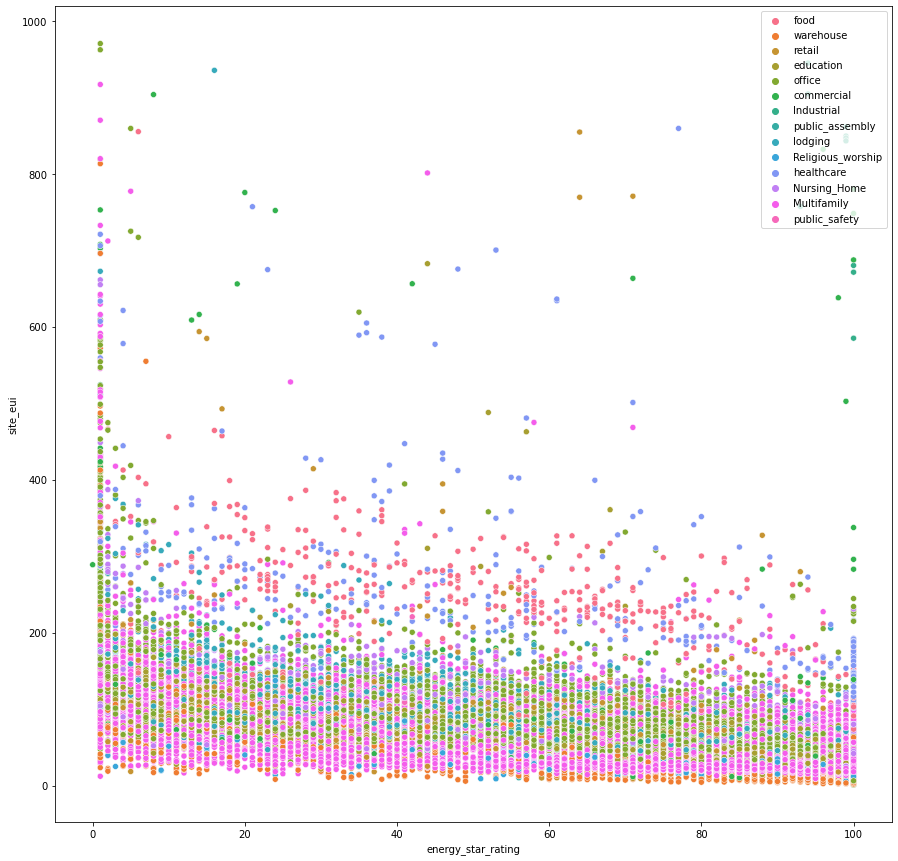

In [8]:
fig, axs = plt.subplots(figsize=(15,15))
sns.scatterplot(data=climate, x='energy_star_rating', y='site_eui', hue='facility_type')
plt.legend(loc='upper right')
plt.show()

During EDA while looking at the plot of energy star rating versus site energy usage intensity there appeared to be some bands indicating stratification by facility type. In order to gain a more clear picture of this interaction I have done some additional analysis.

In [9]:
seui_by_type = climate.groupby('facility_type')['site_eui'].mean()
seui_by_type = seui_by_type.sort_values(ascending=False)
print(seui_by_type)

facility_type
healthcare           240.915093
food                 216.441815
Nursing_Home         131.164768
public_safety        126.672943
Industrial           124.899636
public_assembly      105.384268
lodging              100.280221
commercial            92.219247
retail                82.558654
Multifamily           80.084946
office                78.587796
education             77.675166
Religious_worship     43.861790
warehouse             37.208728
Name: site_eui, dtype: float64


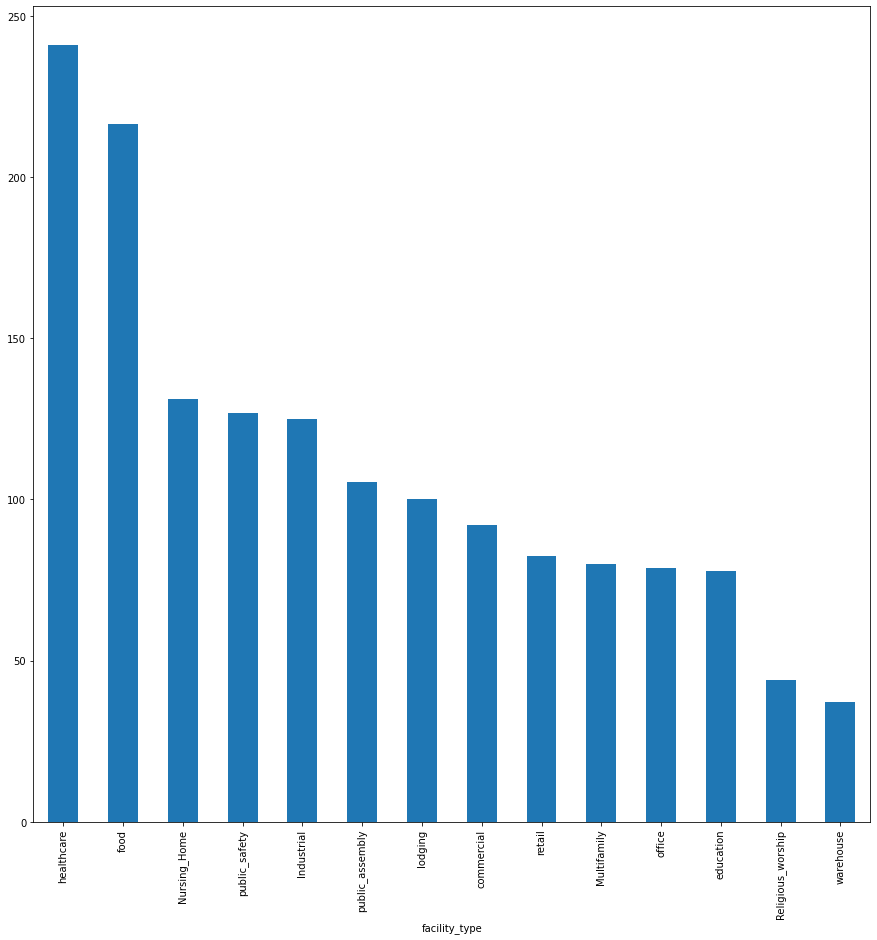

In [10]:
fig, axs = plt.subplots(figsize=(15,15))
seui_by_type.plot(kind='bar')
plt.show()

Looking at the averages of site energy usage intensity we can see that while most of the catagories exist within a band of 80 - 120, healthcare and food are significantly higher, while religious worship and warehouse are significantly lower. These bands can be more easily seen when graphing each facility type seperately.

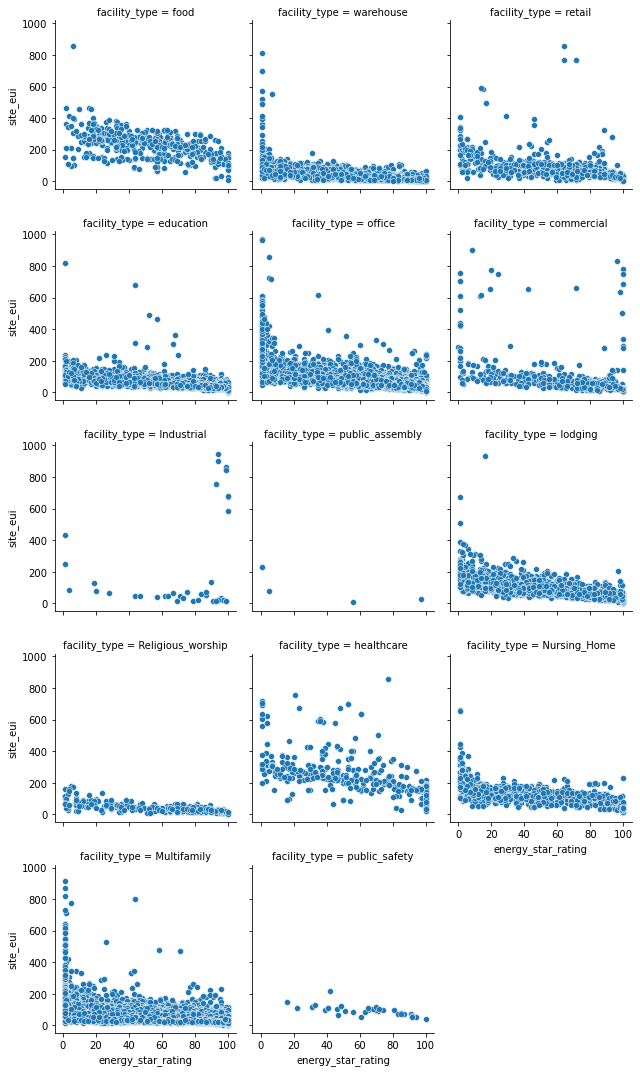

In [11]:
g = sns.FacetGrid(climate, col='facility_type', col_wrap=3)
g.map(sns.scatterplot, 'energy_star_rating', 'site_eui')

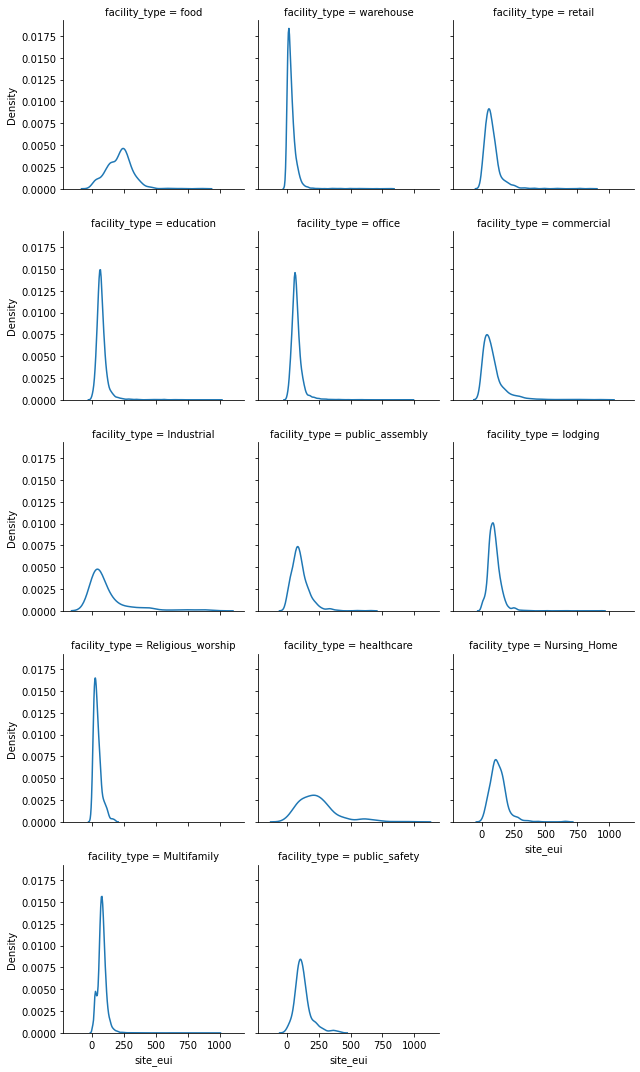

In [12]:
h = sns.FacetGrid(climate, col='facility_type', col_wrap=3)
h.map(sns.kdeplot, 'site_eui')

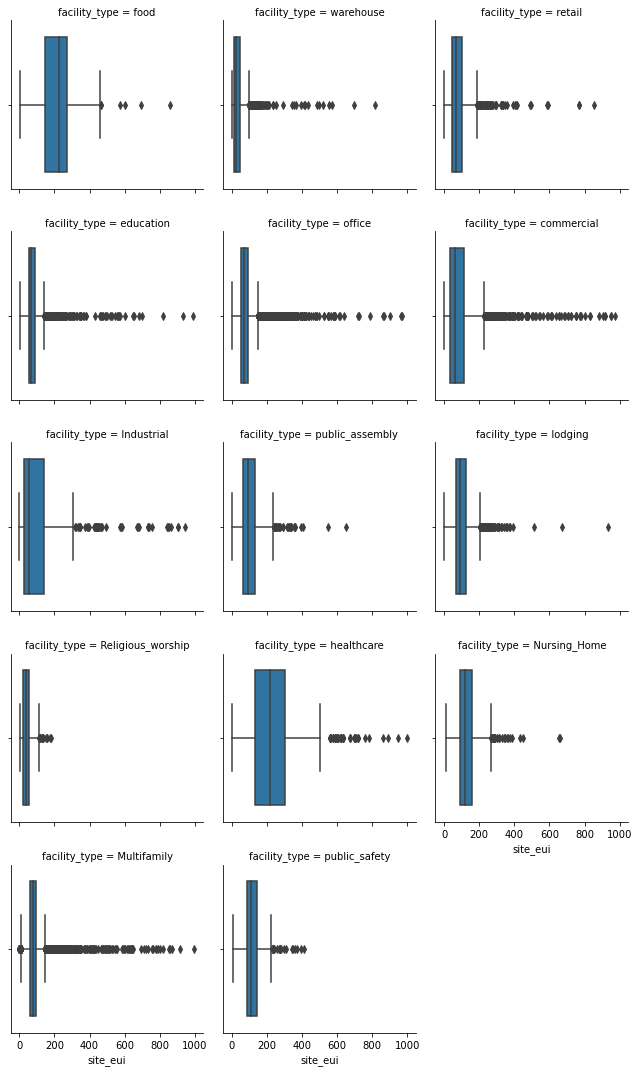

In [13]:
h = sns.FacetGrid(climate, col='facility_type', col_wrap=3)
h.map(sns.boxplot, 'site_eui')